In [1]:
#Importing libraries

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Loading data

df = pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
corr = df.corr()
corr['LoanAmount']

ApplicantIncome      0.570909
CoapplicantIncome    0.188619
LoanAmount           1.000000
Loan_Amount_Term     0.039447
Credit_History      -0.008433
Name: LoanAmount, dtype: float64

<Figure size 1152x864 with 0 Axes>

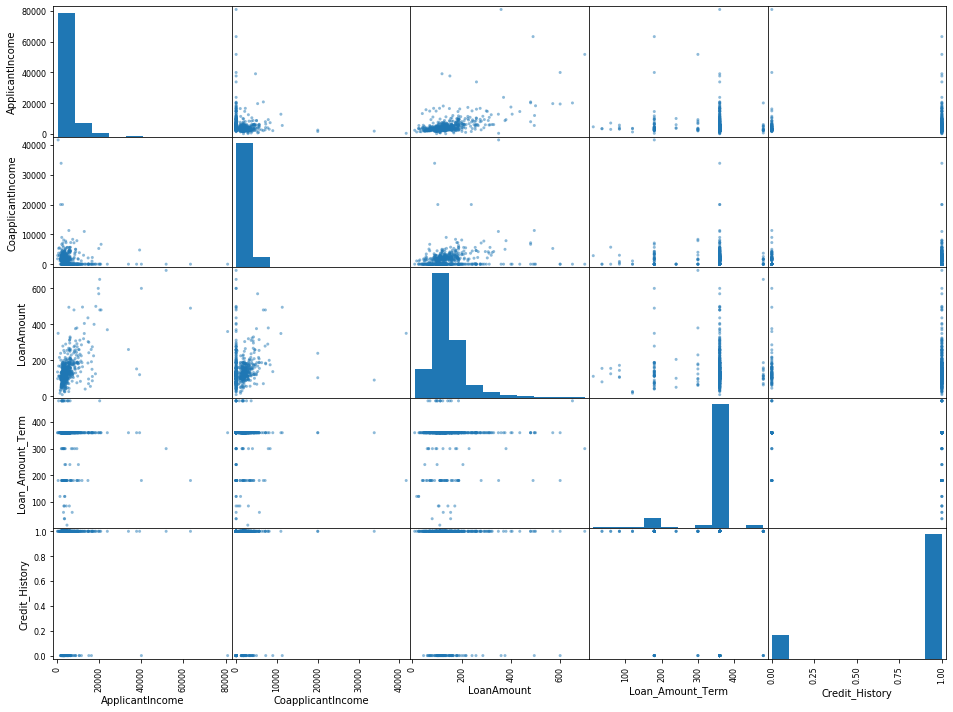

In [9]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=[16,12])
corr_list = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
scatter_matrix(df[corr_list], figsize=(16,12))
plt.show()

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [12]:
yes = df[df['Loan_Status']=='Y']
no = df[df['Loan_Status']=='N']

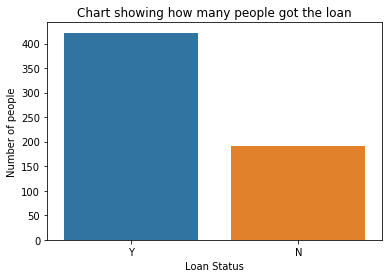

In [13]:
plt.figure(figsize=[6,4])
sns.barplot(x = ['Y','N'],
       y=[len(yes['Loan_Status']),
              len(no['Loan_Status'])])
plt.xlabel('Loan Status')
plt.ylabel('Number of people')
plt.title('Chart showing how many people got the loan')
plt.show()

In [14]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
gender_list = ['Male','Female']
a = 1
gender = pd.DataFrame(columns=['Gender','Y','N'])
for value in gender_list:
    query = df[df['Gender']==value]
    list_num = []
    for val in df['Loan_Status'].unique():
        query_unique = query[query['Loan_Status']==val]
        list_num.append(len(query_unique['Loan_Status']))
    gender = gender.append({'Gender':value,
                           'Y':list_num[0],
                           'N':list_num[1]},ignore_index=True)

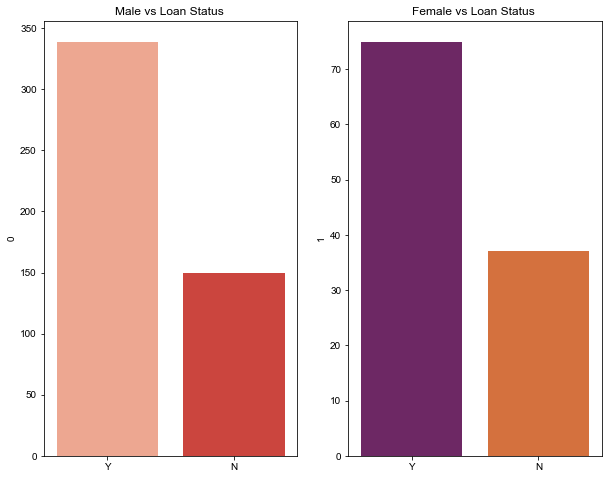

In [17]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.barplot(x = ['Y','N'],
           y = gender.iloc[0, [1,2]],
           palette='Reds')
plt.title(gender.iloc[0, 0] +  ' vs Loan Status ')
plt.subplot(1,2,2)
sns.barplot(x = ['Y','N'],
           y = gender.iloc[1, [1,2]],
           palette='inferno')
plt.title(gender.iloc[1, 0] +  ' vs Loan Status ')
sns.set_style('white')
plt.show()

In [18]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
married_list = ['No','Yes']
married = pd.DataFrame(columns=['Married','Y','N'])
for value in married_list:
    query = df[df['Married']==value]
    list_num = []
    for val in df['Loan_Status'].unique():
        query_unique = query[query['Loan_Status']==val]
        list_num.append(len(query_unique['Loan_Status']))
    married = married.append({'Married':value,
                           'Y':list_num[0],
                           'N':list_num[1]},ignore_index=True)

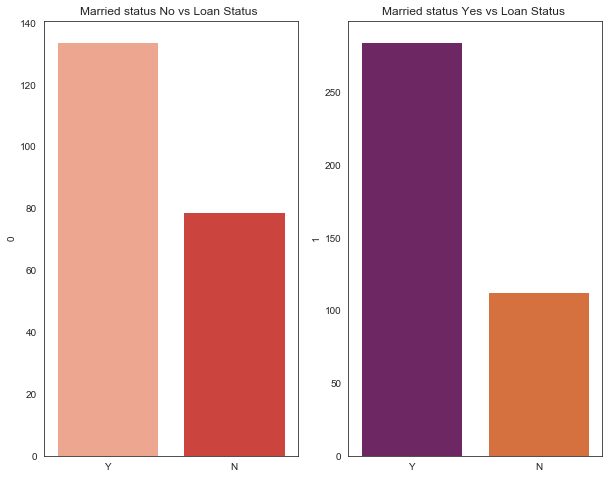

In [20]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.barplot(['Y','N'],
           married.iloc[0, [1,2]],
           palette='Reds')
plt.title('Married status ' + married.iloc[0, 0] +  ' vs Loan Status ')
plt.subplot(1,2,2)
sns.barplot(['Y','N'],
           married.iloc[1, [1,2]],
           palette='inferno')
plt.title('Married status ' + married.iloc[1, 0] +  ' vs Loan Status ')
sns.set_style('darkgrid')
plt.show()

In [21]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

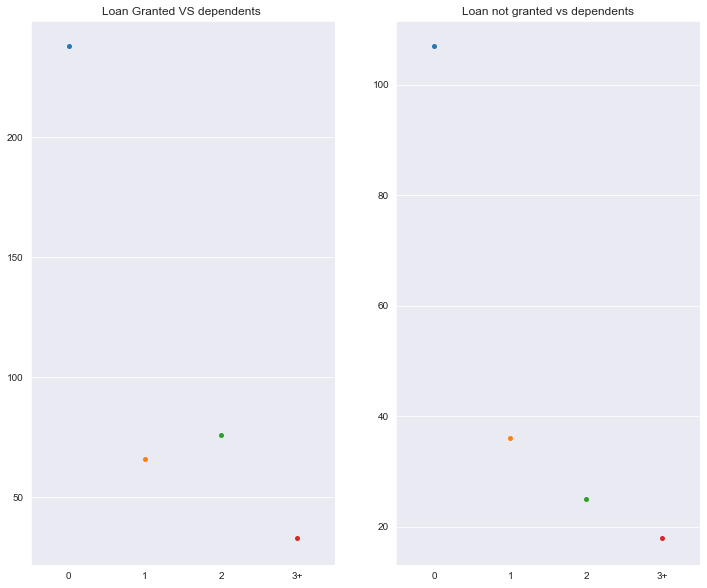

In [22]:
plt.figure(figsize=[12,10])
depend_list = ['0','1','2','3+']
depend_list2 = []
for value in depend_list:
    depend_query = yes[yes['Dependents']==value]
    depend_list2.append(len(depend_query['Dependents']))
plt.subplot(1,2,1)
sns.swarmplot(x=depend_list, y=depend_list2)
plt.title('Loan Granted VS dependents ')
plt.subplot(1,2,2)
depend_list2 = []
for value in depend_list:
    depend_query = no[no['Dependents']==value]
    depend_list2.append(len(depend_query['Dependents']))
sns.swarmplot(x=depend_list, y=depend_list2)
plt.title('Loan not granted vs dependents')
sns.set_style('white')
plt.show()

In [23]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
education_list = ['Graduate','Not Graduate']
education = pd.DataFrame(columns=['Education','Y','N'])
for value in education_list:
    query = df[df['Education']==value]
    list_num = []
    for val in df['Loan_Status'].unique():
        query_unique = query[query['Loan_Status']==val]
        list_num.append(len(query_unique['Loan_Status']))
    education = education.append({'Education':value,
                           'Y':list_num[0],
                           'N':list_num[1]},ignore_index=True)

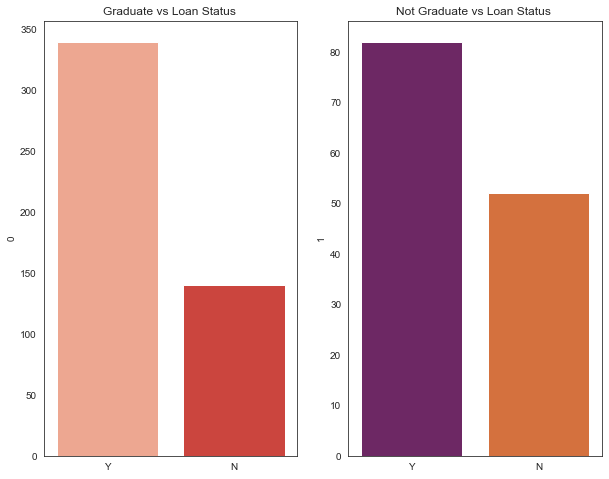

In [25]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.barplot(x = ['Y','N'],
           y = education.iloc[0, [1,2]],
           palette='Reds')
plt.title(education.iloc[0, 0] +  ' vs Loan Status ')
plt.subplot(1,2,2)
sns.barplot(x = ['Y','N'],
           y = education.iloc[1, [1,2]],
           palette='inferno')
plt.title(education.iloc[1, 0] +  ' vs Loan Status ')
sns.set_style('white')
plt.show()

In [26]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
self_employed_list = ['No','Yes']
self_employed = pd.DataFrame(columns=['self_employed','Y','N'])
for value in self_employed_list:
    query = df[df['Self_Employed']==value]
    list_num = []
    for val in df['Loan_Status'].unique():
        query_unique = query[query['Loan_Status']==val]
        list_num.append(len(query_unique['Loan_Status']))
    self_employed = self_employed.append({'Self_Employed':value,
                           'Y':list_num[0],
                           'N':list_num[1]},ignore_index=True)

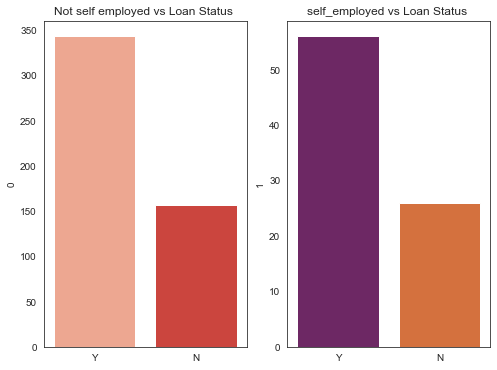

In [28]:
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
sns.barplot(x = ['Y','N'],
           y = self_employed.iloc[0, [1,2]],
           palette='Reds')
plt.title('Not self employed vs Loan Status ')
plt.subplot(1,2,2)
sns.barplot(x = ['Y','N'],
           y = self_employed.iloc[1, [1,2]],
           palette='inferno')
plt.title('self_employed vs Loan Status ')
sns.set_style('white')
plt.show()

In [29]:
nan = df.isnull().sum()
dtype = df.dtypes
pd.DataFrame({'nan':nan,
             'dtype':dtype})
#df['ApplicantIncome']

,nan,dtype
Loan_ID,0,object
Gender,13,object
Married,3,object
Dependents,15,object
Education,0,object
Self_Employed,32,object
ApplicantIncome,0,int64
CoapplicantIncome,0,float64
LoanAmount,22,float64
Loan_Amount_Term,14,float64


In [30]:
X_1 = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

object_fill = SimpleImputer(strategy='constant', fill_value='missing')
num_fill = SimpleImputer(strategy='mean')

object_data = ['Gender','Married','Dependents','Self_Employed']
num_data = ['LoanAmount','Loan_Amount_Term','Credit_History']

X_1[object_data] = object_fill.fit_transform(X_1[object_data])
X_1[num_data] = num_fill.fit_transform(X_1[num_data])

In [32]:
X_1.isnull().sum()
#X_1.shape
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
X_1['Dependents'] = encode.fit_transform(X_1['Dependents'])
X_1['Married'] = encode.fit_transform(X_1['Married'])

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_data = ['Gender','Education','Self_Employed','Property_Area']

fill_cat = ColumnTransformer(transformers=[('encoder',
                                            OneHotEncoder(),
                                            cat_data)],
                            remainder='passthrough')

X = np.array(fill_cat.fit_transform(X_1))
X.shape

(614, 18)

In [34]:
y = y.values

In [35]:
test_data = pd.read_csv('test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [36]:
X_test = test_data.drop('Loan_ID', axis=1)
X_test.isnull().sum()
X_test['CoapplicantIncome'] = X_test['CoapplicantIncome'].astype('float')
pd.DataFrame({'Type':X_test.dtypes,
              'Null Values':X_test.isnull().sum()})
#X_test.shape

,Type,Null Values
Gender,object,11
Married,object,0
Dependents,object,10
Education,object,0
Self_Employed,object,23
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,5
Loan_Amount_Term,float64,6
Credit_History,float64,29


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

object_fill = SimpleImputer(strategy='constant', fill_value='missing')
num_fill = SimpleImputer(strategy='mean')

object_data = ['Gender','Dependents','Self_Employed']
num_data = ['LoanAmount','Loan_Amount_Term','Credit_History']

X_test[object_data] = object_fill.fit_transform(X_test[object_data])
X_test[num_data] = num_fill.fit_transform(X_test[num_data])

In [38]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [39]:
X_test.dtypes
X_test['Dependents'] = encode.fit_transform(X_test['Dependents'])
X_test['Married'] = encode.fit_transform(X_test['Married'])

In [40]:
from sklearn.preprocessing import OneHotEncoder

cat_data = ['Gender','Education','Self_Employed','Property_Area']

fill_cat = ColumnTransformer(transformers=[('encoder',
                                            OneHotEncoder(),
                                            cat_data)],
                            remainder='passthrough')

X_test = np.array(fill_cat.fit_transform(X_test))
X_test.shape

(367, 18)

In [42]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)
X_test2 = scale.transform(X_test)



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier()

random_dict = {'n_estimators':[1000,5000,10000],
              'criterion':['gini','entropy'],
              'class_weight':['balanced','balanced_subsample']}
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=random_dict,
                           n_iter=10,
                           cv=5)
rs_clf.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [50]:
from sklearn.model_selection import cross_val_score
print(f'The accuracy is : {np.mean(cross_val_score(rs_clf, X, y, cv=3)) * 100:.2f}%')

The accuracy is : 78.18%


In [51]:
y_pred = rs_clf.predict(X_test2)
final_submission = pd.DataFrame({'Loan_ID':test_data['Loan_ID'],
                                ('Loan_Status'):y_pred})
final_submission.to_csv('submission_dat.csv', index=False)